In [2]:
import h5py
import numpy as np
import pandas as pd
import scipy
from scipy import signal
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')

In [3]:
def getData(cfileName):

    # Read the *.cfile which has each element in float32 format.
    data = np.fromfile(cfileName, dtype="float32")

    # Take each consecutive interleaved I sample and Q sample to create a single complex element.
    data = data[0::2] + 1j*data[1::2]
    #print("data type=", type(data))
    # Return the complex numpy array.
    return data


def create_dataset(data, class_label):
    f, t, Zxx = signal.stft(data, fs=20e6, nperseg=fft_size, noverlap=fft_overlap)
    print(len(f))
    print(len(t))
    print(Zxx.shape)

    del data

    Zxx = Zxx.transpose()

    Zxx = abs(Zxx)
    # scaling the features (only real part of the data can be used)
    scaler = MinMaxScaler()
    scaler.fit(Zxx)
    print(scaler.data_max_)
    Zxx = scaler.transform(Zxx)

    X = Zxx[:num_samp_per_class]
    Y = np.full(num_samp_per_class, class_label)

    return X, Y


# number of samples per class
num_samp_per_class = 10000

# FFT size for the STFT operation (which is same as the feature vector size)
fft_size = feature_vector_size = 2048 #1024

# number of overlapping samples for the STFT operation
fft_overlap = 256

## iPhone13_I dataset

In [3]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_I/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[0.015625 +0.015625j  0.       +0.j        0.0078125+0.j        ...
 0.0234375+0.0078125j 0.0234375+0.0078125j 0.03125  -0.0078125j]
2048
77387
(2048, 77387)
[0.01826616 0.00950806 0.00373913 ... 0.00167015 0.00381105 0.00957042]
0
(10000, 2048)
(10000,)
[0.0078125+0.015625j  0.0078125+0.j        0.015625 +0.j        ...
 0.015625 +0.0234375j 0.015625 +0.j        0.015625 +0.j       ]
2048
81265
(2048, 81265)
[0.01835838 0.00961773 0.00350257 ... 0.00192106 0.00369137 0.00963282]
1
(20000, 2048)
(20000,)
[0.03125  +0.015625j  0.03125  +0.0078125j 0.015625 +0.0078125j ...
 0.0234375+0.015625j  0.0234375+0.0078125j 0.015625 -0.0078125j]
2048
82947
(2048, 82947)
[0.01815592 0.00944388 0.00397235 ... 0.00185365 0.0036876  0.00957425]
2
(30000, 2048)
(30000,)
[0.       +0.03125j  0.       +0.j       0.015625 +0.j       ...
 0.015625 -0.015625j 0.0234375+0.015625j 0.0078125+0.015625j]
2048
82654
(2048, 82654)
[0.01825963 0.00967498 0.00359683 ... 0.00195847 0.00358379 0.01038325]
3
(40000, 2

In [4]:
# Split data to train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=0)

## Logistic Regression for Feature Selection

In [4]:
from sklearn.feature_selection import SelectKBest, SelectPercentile
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.feature_selection import SelectFromModel

In [6]:
sel = SelectFromModel(LinearRegression())
sel.fit(X_train, y_train)

SelectFromModel(estimator=LinearRegression())

In [7]:
sel.get_support()

array([ True,  True, False, ..., False, False,  True])

In [8]:
sel.estimator_.coef_

array([-6.6627555 ,  2.07759   , -0.19002283, ..., -0.05159498,
       -0.14759128,  2.628275  ], dtype=float32)

In [9]:
mean = np.mean(np.abs(sel.estimator_.coef_))
mean

0.24800664

In [10]:
np.abs(sel.estimator_.coef_)

array([6.6627555 , 2.07759   , 0.19002283, ..., 0.05159498, 0.14759128,
       2.628275  ], dtype=float32)

In [11]:
X_train_reg = sel.transform(X_train)
X_test_reg = sel.transform(X_test)

In [12]:
X_test_reg.shape

(10000, 476)

In [13]:
feature_vector_size = np. size(X_test_reg, 1)

In [14]:
model = keras.models.Sequential()
model.add(keras.layers.Input(shape=(feature_vector_size,)))
model.add(keras.layers.Dense(1400, activation="relu"))
model.add(keras.layers.Dense(800, activation="relu"))
model.add(keras.layers.Dense(500, activation="relu"))
model.add(keras.layers.Dense(200, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              667800    
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 


2023-04-17 18:51:55.339237: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 2,310,410
Trainable params: 2,310,410
Non-trainable params: 0
_________________________________________________________________


In [15]:
opt = keras.optimizers.SGD(learning_rate=0.001)
model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

In [16]:
checkpoint_cb = keras.callbacks.ModelCheckpoint("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_Logistic_regression_feature_selection/iPhone13_I_LG_Model.h5", save_best_only=True)
history = model.fit(X_train_reg, y_train, epochs=30, validation_split=0.1, callbacks=[checkpoint_cb])

Epoch 1/30
2532/2532 [==============================] - 16s 6ms/step - loss: 2.2472 - accuracy: 0.4378 - val_loss: 2.1757 - val_accuracy: 0.4906
Epoch 2/30
2532/2532 [==============================] - 16s 6ms/step - loss: 2.0085 - accuracy: 0.6061 - val_loss: 1.7719 - val_accuracy: 0.8549
Epoch 3/30
2532/2532 [==============================] - 16s 6ms/step - loss: 1.4209 - accuracy: 0.9270 - val_loss: 1.0110 - val_accuracy: 0.9299
Epoch 4/30
2532/2532 [==============================] - 15s 6ms/step - loss: 0.6340 - accuracy: 0.9623 - val_loss: 0.3690 - val_accuracy: 0.9274
Epoch 5/30
2532/2532 [==============================] - 15s 6ms/step - loss: 0.2561 - accuracy: 0.9879 - val_loss: 0.1776 - val_accuracy: 0.9917
Epoch 6/30
2532/2532 [==============================] - 16s 6ms/step - loss: 0.1345 - accuracy: 0.9943 - val_loss: 0.0992 - val_accuracy: 0.9958
Epoch 7/30
2532/2532 [==============================] - 15s 6ms/step - loss: 0.0772 - accuracy: 0.9963 - val_loss: 0.0604 - val_ac

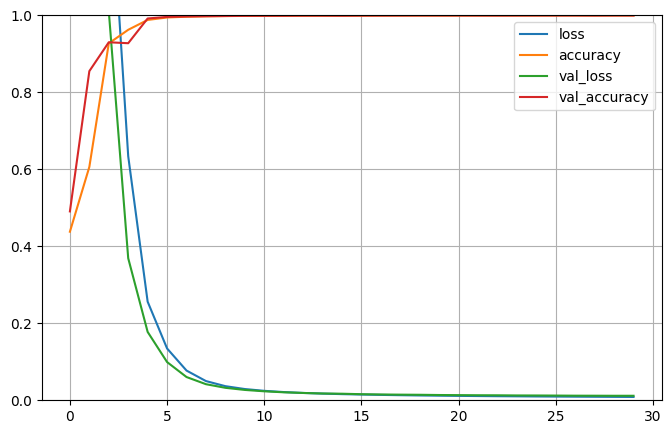

In [17]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [18]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_Logistic_regression_feature_selection/iPhone13_I_LG_Model.h5")

In [21]:
results = model.evaluate(X_test_reg, y_test)
print("test loss, test acc:", results)

313/313 [==============================] - 1s 3ms/step - loss: 0.0147 - accuracy: 0.9991
test loss, test acc: [0.014736717566847801, 0.9991000294685364]


In [23]:
y_pred = np.argmax(model.predict(X_test_reg), axis=-1)
print(y_pred)
print(y_pred[0])

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

313/313 [==============================] - 1s 3ms/step
[0 6 5 ... 5 5 6]
0
[[1011    0    0    0    0    0    0    0    0    0]
 [   0 1009    0    0    0    1    0    0    0    0]
 [   0    0  991    0    0    2    0    0    0    0]
 [   1    0    0  938    0    0    0    0    0    0]
 [   0    2    0    0 1041    0    0    0    0    0]
 [   0    1    0    0    0 1026    0    0    0    0]
 [   1    1    0    0    0    0  997    0    0    0]
 [   0    0    0    0    0    0    0  974    0    0]
 [   0    0    0    0    0    0    0    0 1003    0]
 [   0    0    0    0    0    0    0    0    0 1001]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1011
           1       1.00      1.00      1.00      1010
           2       1.00      1.00      1.00       993
           3       1.00      1.00      1.00       939
           4       1.00      1.00      1.00      1043
           5       1.00      1.00      1.00      1027
           6   

Test Accuracy:0.9991


Text(0.5, 1.0, 'Accuracy:0.999')

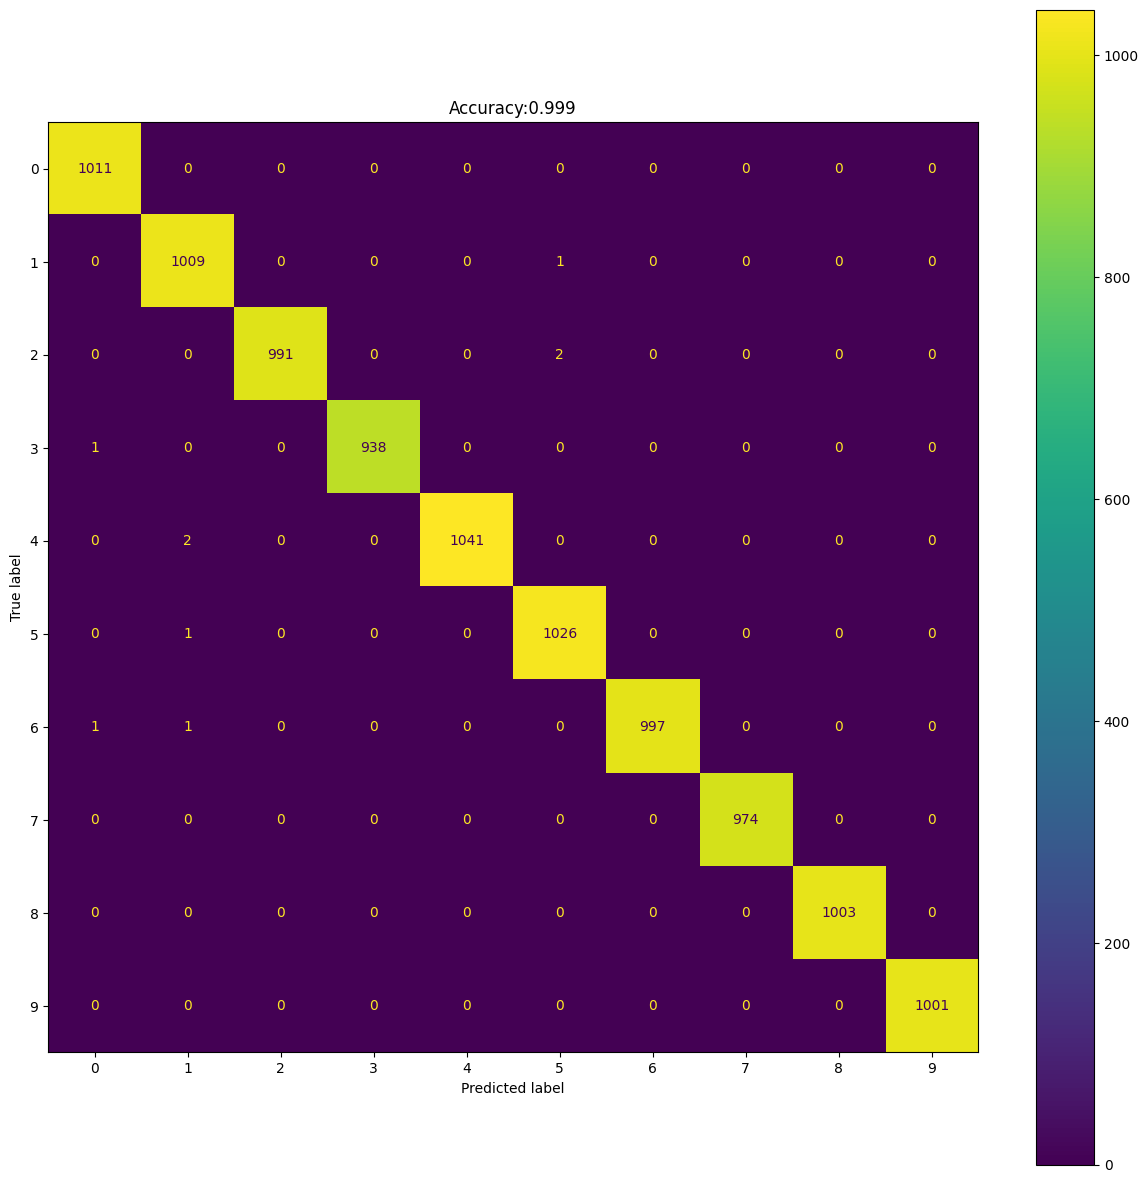

In [26]:
# confusion matrix plot
plt.rcParams["figure.figsize"] = (15,15)
fig, axs = plt.subplots(1)

test_acc = metrics.accuracy_score(y_pred,y_test)
print(f"Test Accuracy:{test_acc}")
metrics.ConfusionMatrixDisplay.from_predictions(y_test, y_pred, ax=axs)
plt.title(f"Accuracy:{test_acc:.3f}")
# plt.savefig(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_II_confusion_matrix.pdf')

## Test a trained Model to a different dataset

## iPhone13_II dataset

In [5]:
class_label = 10
for i in range(class_label):

    folder_path = "/Volumes/Transcend/PhD in Computing/Data Collection/Smartphones/EM_Signals/iPhone13/iPhone13_II/"
    if(i==0):
        data = getData(folder_path + "calender-app.cfile")
        print(np.array(data))
        X, Y = create_dataset(data, i)

    else:

        if(i==1):
            data = getData(folder_path + "camera-photo.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==2):
            data = getData(folder_path + "camera-video.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==3):
            data = getData(folder_path + "email-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==4):
            data = getData(folder_path + "gallery-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==5):
            data = getData(folder_path + "home-screen.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==6):
            data = getData(folder_path + "idle.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==7):
            data = getData(folder_path + "phone-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==8):
            data = getData(folder_path + "sms-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        if(i==9):
            data = getData(folder_path + "web_browser-app.cfile")
            print(np.array(data))
            dataset, label = create_dataset(data, i)

        X = np.concatenate((X, dataset), axis=0) 
        Y = np.concatenate((Y, label), axis=0)
        
    print(i)
    print(X.shape)
    print(Y.shape)

# combine all em signals into one dataframe
em_data = pd.DataFrame(X)
em_data.insert(len(em_data.columns), 'labels', Y)

# save to csv file
# (em_data.T).to_csv(f'/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/i13_I_BeSh.csv', header=False)

[ 0.078125 +0.09375j    0.5625   -0.8046875j -0.984375 +0.9921875j ...
  0.015625 +0.015625j   0.0078125-0.0078125j  0.015625 +0.015625j ]
2048
81191
(2048, 81191)
[0.03497613 0.0617279  0.03110138 ... 0.02998163 0.05360715 0.04346049]
0
(10000, 2048)
(10000,)
[0.015625 +0.0078125j 0.03125  +0.0078125j 0.0078125+0.015625j  ...
 0.0078125+0.0078125j 0.0234375+0.0078125j 0.015625 +0.j       ]
2048
72123
(2048, 72123)
[0.0184771  0.00980769 0.00377408 ... 0.00184979 0.00378497 0.00949242]
1
(20000, 2048)
(20000,)
[0.0234375+0.0078125j 0.015625 +0.0078125j 0.0078125+0.015625j  ...
 0.015625 +0.0078125j 0.0078125+0.j        0.0234375+0.0078125j]
2048
92893
(2048, 92893)
[0.01809648 0.00941779 0.00405625 ... 0.00197094 0.00359252 0.00953348]
2
(30000, 2048)
(30000,)
[-0.0078125-0.0078125j  0.0234375-0.0078125j  0.0234375+0.j        ...
  0.03125  +0.0078125j  0.015625 +0.0078125j  0.03125  +0.j       ]
2048
56322
(2048, 56322)
[0.01820297 0.00946224 0.00370945 ... 0.00208693 0.00383636 0.009

Cross-model Validation without training

In [6]:
model = keras.models.load_model("/Users/Lojenaa/Documents/PhD/Smartphones/Cross-device-Portability-of-EMSCA/Smartphones/iPhone/iPhone13/iPhone13_Logistic_regression_feature_selection/iPhone13_I_LG_Model.h5")
model.summary()

2023-04-19 11:15:49.586342: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 1400)              667800    
                                                                 
 dense_1 (Dense)             (None, 800)               1120800   
                                                                 
 dense_2 (Dense)             (None, 500)               400500    
                                                                 
 dense_3 (Dense)             (None, 200)               100200    
                                                                 
 dense_4 (Dense)             (None, 100)               20100     
                                                                 
 dense_5 (Dense)             (None, 10)                1010      
                                                                 
Total params: 2,310,410
Trainable params: 2,310,410
Non-

In [7]:
sel = SelectFromModel(LinearRegression())
sel.fit(X, Y)

SelectFromModel(estimator=LinearRegression())

In [8]:
sel.get_support()

array([ True,  True,  True, ..., False, False,  True])

In [9]:
sel.estimator_.coef_

array([-1.071996  ,  2.195732  ,  0.3421899 , ...,  0.03307049,
        0.17408371, -1.143582  ], dtype=float32)

In [10]:
mean = np.mean(np.abs(sel.estimator_.coef_))
mean

0.25845665

In [11]:
np.abs(sel.estimator_.coef_)

array([1.071996  , 2.195732  , 0.3421899 , ..., 0.03307049, 0.17408371,
       1.143582  ], dtype=float32)

In [14]:
X_reg = sel.transform(X)

In [16]:
X_reg.shape

(100000, 535)

In [17]:
results = model.evaluate(X_reg, Y)
print("test loss, test acc:", results)

ValueError: in user code:

    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1727, in test_function  *
        return step_function(self, iterator)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1713, in step_function  **
        outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1701, in run_step  **
        outputs = model.test_step(data)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/training.py", line 1665, in test_step
        y_pred = self(x, training=False)
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/utils/traceback_utils.py", line 70, in error_handler
        raise e.with_traceback(filtered_tb) from None
    File "/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/keras/engine/input_spec.py", line 295, in assert_input_compatibility
        raise ValueError(

    ValueError: Input 0 of layer "sequential" is incompatible with the layer: expected shape=(None, 476), found shape=(32, 535)
